In [56]:
import pandas as pd


# Charger les donnèes à partir d'un fichier csv
#Lien vers la dataset : http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv
# read CSV file directly from a URL and save the results
data = pd.read_csv('C:/Users/rlahouar/Desktop/rio/Datasets/Advertising/Advertising.csv', index_col=0)

In [57]:
# display the first 5 rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [58]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

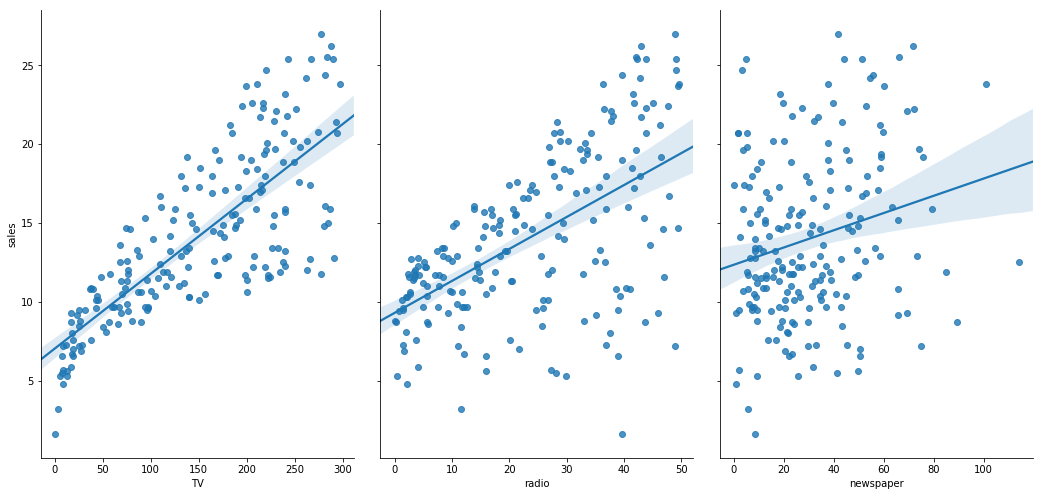

In [59]:
#Visualizing data using seaborn

# Import seaborn : Python library for statistical data visualization built on top of Matplotlib
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [60]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'radio', 'newspaper']]

# print the first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [61]:
# select a Series from the DataFrame
y = data['sales']


# equivalent command that works if there are no spaces in the column name
y = data.sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [62]:
# Splitting X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [63]:
#Linear regression in scikit-learn

# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [65]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150288),
 ('radio', 0.17915812245088839),
 ('newspaper', 0.0034504647111803779)]

In [42]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [43]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

# calculate Mean Absolute Error MEA by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [48]:
# calculate MSE by hand
print('MSE by hand', (10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print('MSE using scikit-learn',metrics.mean_squared_error(true, pred))

MSE by hand 150.0
MSE using scikit-learn 150.0


In [49]:
# calculate RMSE by hand
import numpy as np
print('MSE by hand',np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print('MSE using scikit-learn',np.sqrt(metrics.mean_squared_error(true, pred)))

MSE by hand 12.2474487139
MSE using scikit-learn 12.2474487139


In [50]:
#Computing the RMSE for our Sales predictions
print('RMSE for our Sales predictions',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE for our Sales predictions 1.40465142303


In [54]:
#Computing the RMSE for our Sales predictions after doing a Feature selection
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print('RMSE for our Sales predictions after Feature selection',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


RMSE for our Sales predictions after Feature selection 1.38790346994
